In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt

size of the lattice

In [3]:
N = 100

Matrix containing the distribution of particles. At t = 0 the lattice is empty

In [4]:
M = np.zeros((N,N))

Possible moves depending on the location of the particle: center, edged, corners.

In [5]:
moves_center = [[1,0],[-1,0],[0,1],[0,-1],[1,1],[1,-1],[-1,1],[-1,-1]]
moves_north = [[1,0],[-1,0],[0,-1],[1,-1],[-1,-1]]
moves_south = [[1,0],[-1,0],[0,1],[1,1],[-1,1]]
moves_east = [[-1,0],[0,1],[0,-1],[-1,1],[-1,-1]]
moves_west = [[1,0],[0,1],[0,-1],[1,1],[1,-1]]
moves_sw = [[1,0],[0,1],[1,1]]
moves_se = [[-1,0],[0,1],[-1,1]]
moves_nw = [[1,0],[0,-1],[1,-1]]
moves_ne = [[-1,0],[0,-1],[-1,-1]]

Defining the jumps based on the original position

In [6]:
def jump(p_coord):
    if 0 < p_coord[0] < N-1 and 0 < p_coord[1] < N-1:
        p_coord = np.add(p_coord, moves_center[np.random.randint(len(moves_center))])
    if 0 < p_coord[0] < N-1 and p_coord[1]==N-1:
        p_coord = np.add(p_coord, moves_north[np.random.randint(len(moves_north))])
    if 0 < p_coord[0] < N-1 and p_coord[1]==0:
        p_coord = np.add(p_coord, moves_south[np.random.randint(len(moves_south))])
    if 0 < p_coord[1] < N-1 and p_coord[0]==N-1:
        p_coord = np.add(p_coord, moves_east[np.random.randint(len(moves_east))])
    if 0 < p_coord[1] < N-1 and p_coord[0]==0:
        p_coord = np.add(p_coord, moves_west[np.random.randint(len(moves_west))])
    if p_coord[0] == 0 and p_coord[1] == 0:
        p_coord = np.add(p_coord, moves_sw[np.random.randint(len(moves_sw))])
    if p_coord[0] == N-1 and p_coord[1] == 0:
        p_coord = np.add(p_coord, moves_se[np.random.randint(len(moves_se))])
    if p_coord[0] == 0 and p_coord[1] == N-1:
        p_coord = np.add(p_coord, moves_nw[np.random.randint(len(moves_nw))])
    if p_coord[0] == N-1 and p_coord[1] == N-1:
        p_coord = np.add(p_coord, moves_ne[np.random.randint(len(moves_ne))])
        
    return p_coord

Defining the random walk for a particle given an initial position. The matrix M is updated by adding one particle to the landing position. 

In [7]:
def iteration(p0, M, T):
    for ii in range(T):
        p0 = jump(p0)
    M[p0[0]][p0[1]] = M[p0[0]][p0[1]] + 1
    return M

Starting at two different positions, a large number of particles are launched

In [8]:
p0 = [50,50]
p1 = [20,80]
for iii in range(10000):
    M = iteration(p0, M, 100)
    M = iteration(p1, M, 100)

Plotting the results

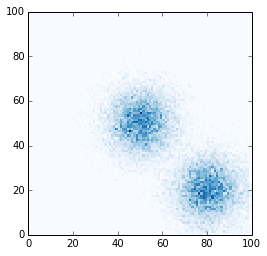

In [9]:
fig, ax = plt.subplots()
heatmap = ax.pcolor(M, cmap=plt.cm.Blues)
ax.set_aspect(1)
plt.show()

In [10]:
p0 = [50,50]
p1 = [20,80]
for iii in range(10000):
    M = iteration(p0, M, 1000)
    M = iteration(p1, M, 1000)